# Modeling: Student Performance Prediction

This notebook evaluates the predictive quality of the student dataset using both regression and classification approaches. Multiple models and evaluation metrics are used for comparison.

## Objectives

- Predict final grades using regression
- Predict pass/fail outcomes using classification

## Workflow

### Part 1: Regression
- Models: Linear, Ridge, Lasso, Random Forest
- Metrics: R², MAE, MSE, RMSE, MAPE

### Part 2: Classification
- Models: Logistic Regression, Random Forest, KNN, SVM
- Metrics: Accuracy, Precision, Recall, F1-score, AUC, Confusion Matrix

The dataset is fully preprocessed and ready for modeling.


In [21]:
# Core libraries
import pandas as pd
import numpy as np
import warnings
from pathlib import Path
import sys

# Silence warnings
warnings.filterwarnings("ignore")

# Add parent directory to path for custom module imports
sys.path.append(str(Path().resolve().parent))

# Custom modules
from scripts.data_loader import load_raw
from scripts.models import (evaluate_model, 
                            plot_predictions, 
                            find_optimal_params, 
                            find_optimal_classification_params,
                            evaluate_classifier,
                            plot_confusion_matrix)
from scripts.saver import save_plot, save_dataset

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [22]:
df =  load_raw("data-cleaned.csv")

## Regression

We define `final_grade` as the target variable and split the data into training and testing sets.


In [23]:
# Define features and target
y = df["final_grade"]
X = df.drop(columns=["final_grade", "passed", "student_id"], errors="ignore")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set: {X_train.shape}, Test set: {X_test.shape}")

# Initialize results tracking
results_df = pd.DataFrame()

Training set: (282, 38), Test set: (71, 38)


---

### Linear Regression

,Model,R2,MAE,MSE,RMSE,MAPE
0,Linear Regression Test,0.775,1.507,4.218,2.054,1.324935e+15
1,Linear Regression Train,0.869,1.168,2.780,1.667,1.598309e+15


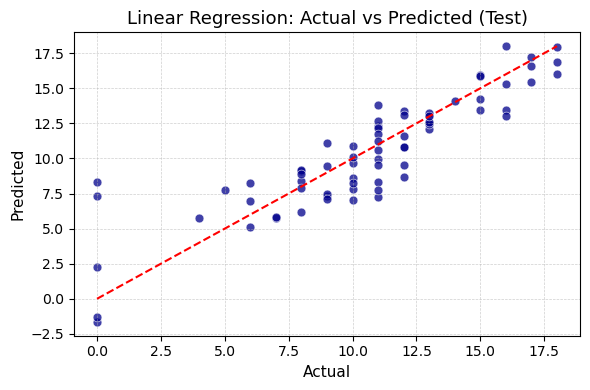

In [24]:
lr = LinearRegression()
lr.fit(X_train, y_train)
results_df = evaluate_model(lr, X_train, X_test, y_train, y_test, "Linear Regression", results_df)
lr_plot = plot_predictions(lr, X_test, y_test, "Linear Regression")
display(results_df)

---

### Regularized and Tree-Based Models

We will evaluate Ridge, Lasso, ElasticNet, and Random Forest regressors using hyperparameter tuning.  
For each model, we will:
- Identify the best parameters based on R² score
- Visualize the relationship between R² and the tuned parameter(s)
- Plot predicted vs. actual values on the test set
- Save the trained model and generated plots for reporting and reuse



 Ridge with parameters: {'alpha': 9.5} | Best R²: 0.779


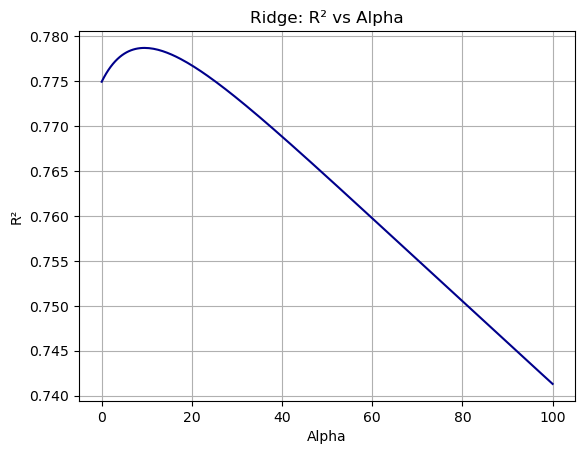

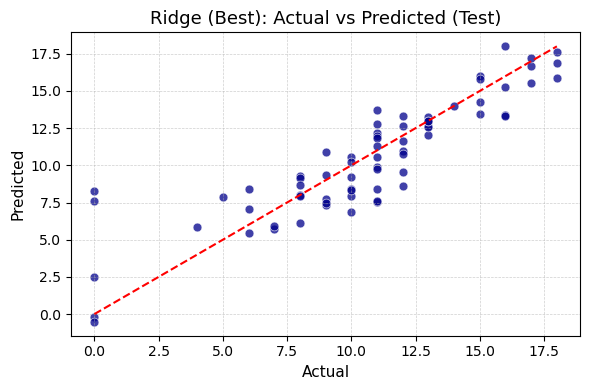

In [25]:
# ---------------------- Ridge ----------------------
ridge_model, ridge_params, ridge_r2_plot = find_optimal_params("Ridge", X_train, y_train, X_test, y_test)
results_df = evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Ridge (Best)", results_df)
ridge_pred_plot = plot_predictions(ridge_model, X_test, y_test, "Ridge (Best)")


 Lasso with parameters: {'alpha': 0.1} | Best R²: 0.808


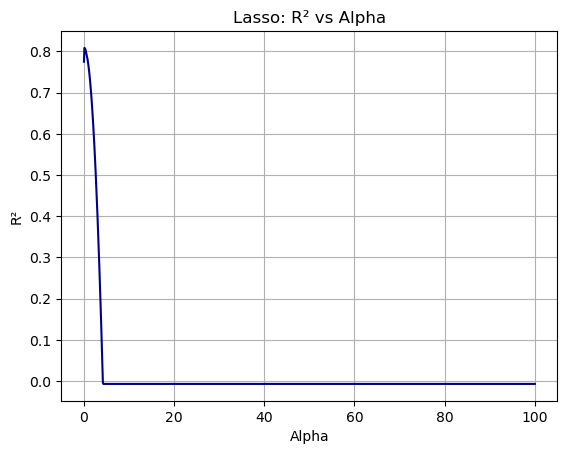

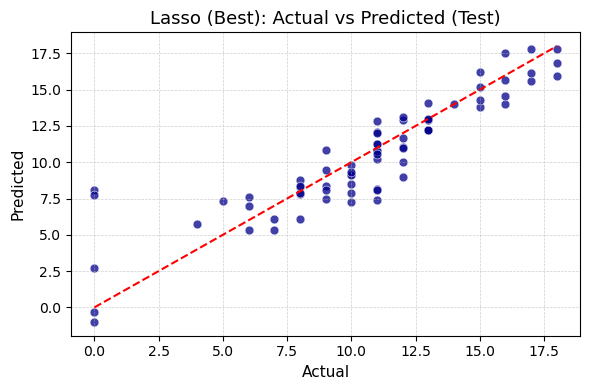

In [26]:
# ---------------------- Lasso ----------------------
lasso_model, lasso_params, lasso_r2_plot = find_optimal_params("Lasso", X_train, y_train, X_test, y_test)
results_df = evaluate_model(lasso_model, X_train, X_test, y_train, y_test, "Lasso (Best)", results_df)
lasso_pred_plot = plot_predictions(lasso_model, X_test, y_test, "Lasso (Best)")


 ElasticNet with parameters: {'alpha': 0.5, 'l1_ratio': 1.0} | Best R²: 0.797


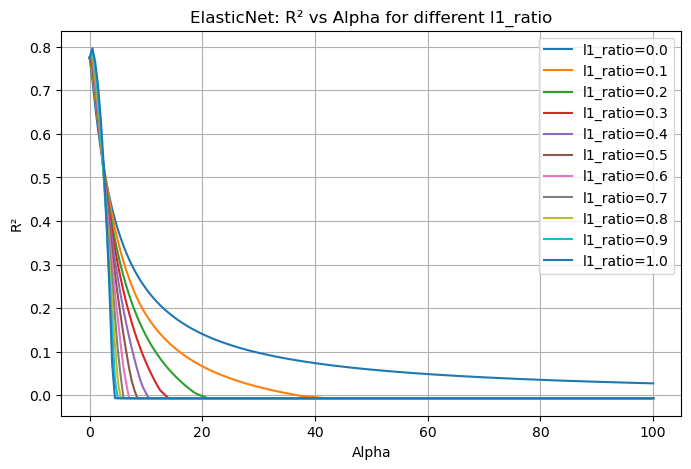

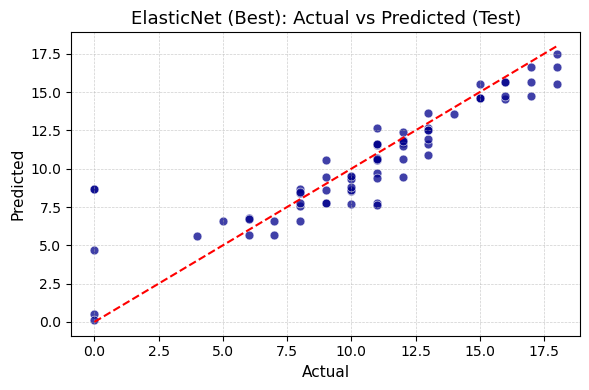

In [27]:
# ---------------------- ElasticNet ----------------------
elastic_model, elastic_params, elastic_r2_plot = find_optimal_params("ElasticNet", X_train, y_train, X_test, y_test)
results_df = evaluate_model(elastic_model, X_train, X_test, y_train, y_test, "ElasticNet (Best)", results_df)
elastic_pred_plot = plot_predictions(elastic_model, X_test, y_test, "ElasticNet (Best)")


 Random Forest with parameters: {'n_estimators': 11} | Best R²: 0.798


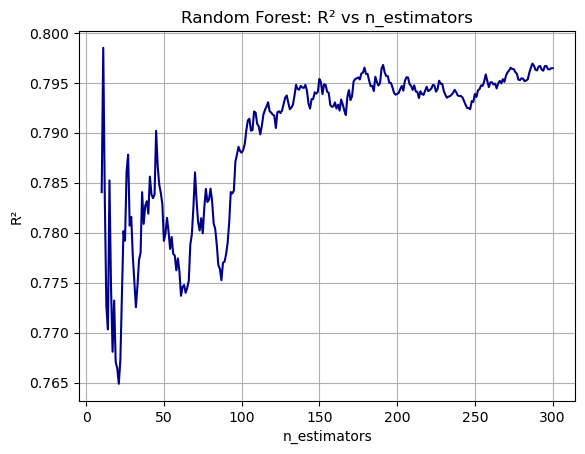

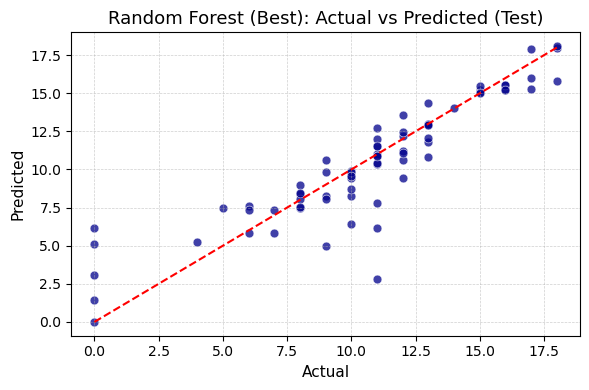

In [28]:
# ---------------------- Random Forest ----------------------
rf_model, rf_params, rf_r2_plot = find_optimal_params("Random Forest", X_train, y_train, X_test, y_test)
results_df = evaluate_model(rf_model, X_train, X_test, y_train, y_test, "Random Forest (Best)", results_df)
rf_pred_plot = plot_predictions(rf_model, X_test, y_test, "Random Forest (Best)")

In [29]:
results_df

,Model,R2,MAE,MSE,RMSE,MAPE
0,Lasso (Best) Test,0.808,1.285,3.590,1.895,1.256853e+15
1,Random Forest (Best) Test,0.798,1.228,3.777,1.943,1.003363e+15
2,ElasticNet (Best) Test,0.797,1.215,3.811,1.952,1.445881e+15
3,Ridge (Best) Test,0.779,1.442,4.147,2.037,1.213195e+15
4,Linear Regression Test,0.775,1.507,4.218,2.054,1.324935e+15
5,Random Forest (Best) Train,0.976,0.374,0.515,0.718,3.252116e+14
6,Linear Regression Train,0.869,1.168,2.780,1.667,1.598309e+15
7,Ridge (Best) Train,0.868,1.162,2.817,1.679,1.588223e+15
8,Lasso (Best) Train,0.858,1.097,3.031,1.741,1.799605e+15
9,ElasticNet (Best) Train,0.811,1.149,4.017,2.004,2.118940e+15


## Based on results the best model is Lasso with alpha = 0.1

## Saving
---

In [30]:
# Save plots
save_plot(ridge_r2_plot, "ridge_r2_curve")
save_plot(ridge_pred_plot, "ridge_predictions")

save_plot(lasso_r2_plot, "lasso_r2_curve")
save_plot(lasso_pred_plot, "lasso_predictions")

save_plot(elastic_r2_plot, "elasticnet_r2_curve")
save_plot(elastic_pred_plot, "elasticnet_predictions")

save_plot(rf_r2_plot, "random_forest_r2_curve")
save_plot(rf_pred_plot, "random_forest_predictions")

# Save results table
save_dataset(results_df, "regression_model_results.csv")

Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/ridge_r2_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/ridge_predictions.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/lasso_r2_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/lasso_predictions.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/elasticnet_r2_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/elasticnet_predictions.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/random_forest_r2_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/random_forest_predictions.png
Dataset saved to: /Users/titanyanlev/student-performance-ml/outputs/reports/regression_model_results.csv


---

## Classification

We define `passed` as 1 if the student's `final_grade` is  greater or equal to 12, and 0 otherwise.  
This binary target will be used for classification modeling.


In [31]:
# Define binary target: passed if final_grade >= 12
df["passed"] = (df["final_grade"] >= 12).astype(int)

# Define features and target
y_class = df["passed"]
X_class = df.drop(columns=["final_grade", "passed", "studet_id",], errors="ignore")

# Train-test split
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42)
print(f"Training set: {X_train_clf.shape}, Test set: {X_test_clf.shape}")

# Initialize results tracking
results_clf = pd.DataFrame()

Training set: (282, 39), Test set: (71, 39)



 Logistic Regression Best Params: {'C': 0.11} | Best F1: 0.828


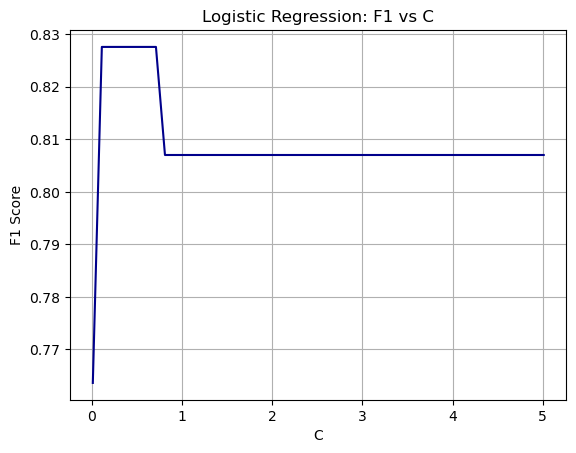

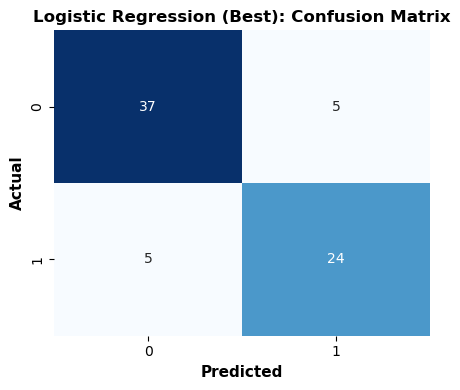

In [32]:
# ---------------------- Logistic Regression ----------------------
logreg_model, logreg_params, logreg_f1_plot = find_optimal_classification_params("Logistic Regression", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(logreg_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "Logistic Regression (Best)", results_clf)
logreg_cm_plot = plot_confusion_matrix(logreg_model, X_test_clf, y_test_clf, "Logistic Regression (Best)")


 KNN Best Params: {'n_neighbors': 1} | Best F1: 0.533


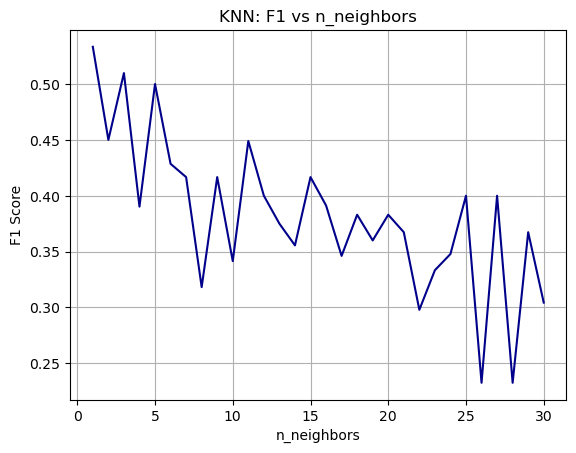

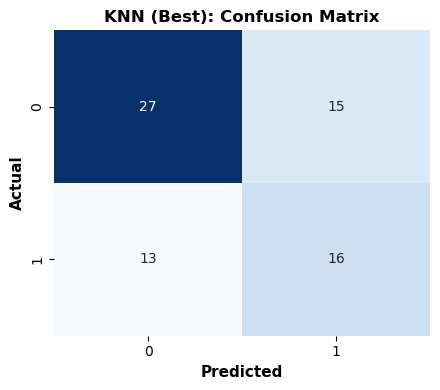

In [33]:
# ---------------------- KNN ----------------------
knn_model, knn_params, knn_f1_plot = find_optimal_classification_params("KNN", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(knn_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "KNN (Best)", results_clf)
knn_cm_plot = plot_confusion_matrix(knn_model, X_test_clf, y_test_clf, "KNN (Best)")


 Decision Tree Best Params: {'max_depth': 4} | Best F1: 0.893


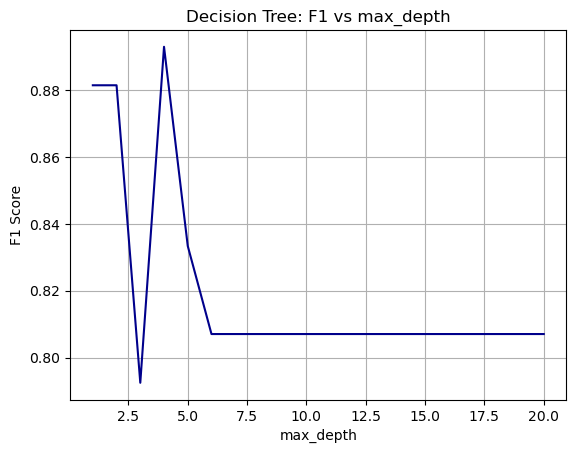

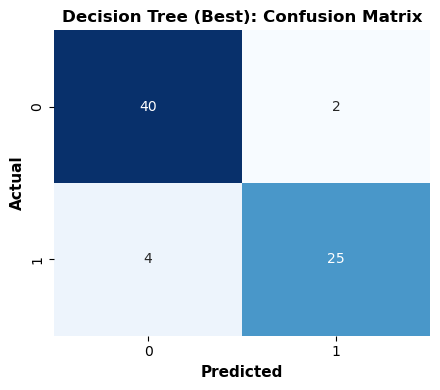

In [34]:
# ---------------------- Decision Tree ----------------------
tree_model, tree_params, tree_f1_plot = find_optimal_classification_params("Decision Tree", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(tree_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "Decision Tree (Best)", results_clf)
tree_cm_plot = plot_confusion_matrix(tree_model, X_test_clf, y_test_clf, "Decision Tree (Best)")


 Random Forest Best Params: {'n_estimators': 50} | Best F1: 0.877


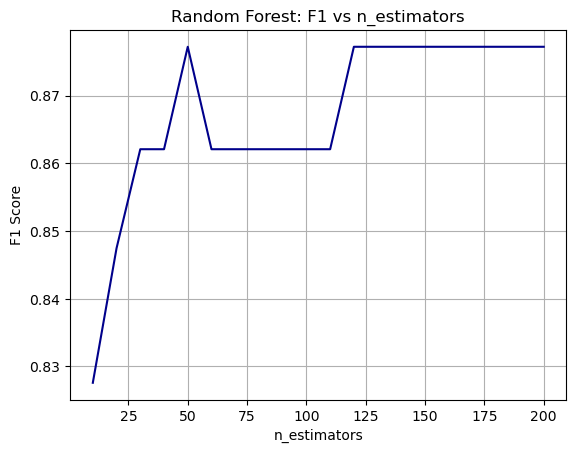

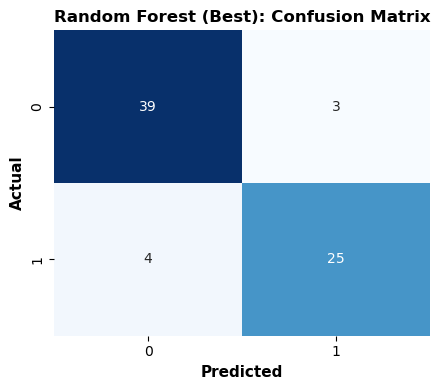

In [35]:
# ---------------------- Random Forest ----------------------
rf_model, rf_params, rf_f1_plot = find_optimal_classification_params("Random Forest", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(rf_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "Random Forest (Best)", results_clf)
rf_cm_plot = plot_confusion_matrix(rf_model, X_test_clf, y_test_clf, "Random Forest (Best)")


 Gradient Boosting Best Params: {'n_estimators': 60} | Best F1: 0.881


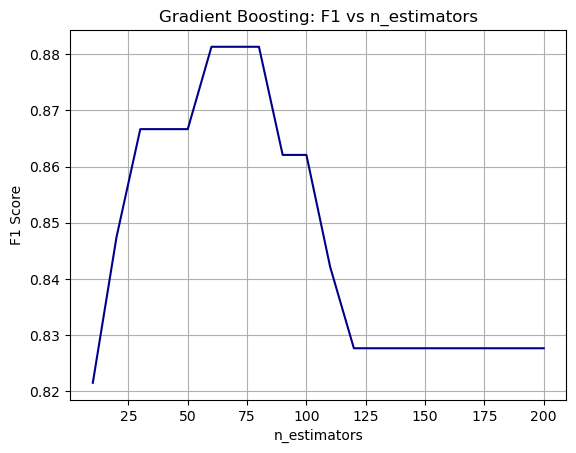

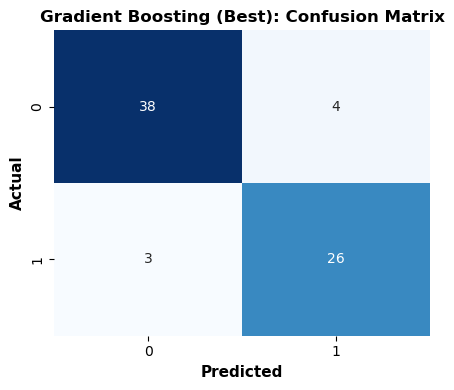

In [36]:
# ---------------------- Gradient Boosting ----------------------
gb_model, gb_params, gb_f1_plot = find_optimal_classification_params("Gradient Boosting", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(gb_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "Gradient Boosting (Best)", results_clf)
gb_cm_plot = plot_confusion_matrix(gb_model, X_test_clf, y_test_clf, "Gradient Boosting (Best)")

Naive Bayes has no tunable parameters.

 Naive Bayes Best Params: {} | Best F1: 0.806


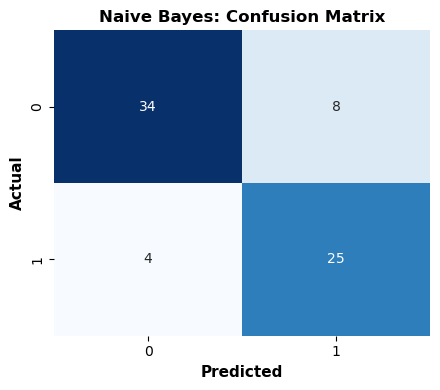

In [37]:
# ---------------------- Naive Bayes ----------------------
nb_model, nb_params, nb_f1_plot = find_optimal_classification_params("Naive Bayes", X_train_clf, y_train_clf, X_test_clf, y_test_clf)
results_clf = evaluate_classifier(nb_model, X_train_clf, X_test_clf, y_train_clf, y_test_clf, "Naive Bayes", results_clf)
nb_cm_plot = plot_confusion_matrix(nb_model, X_test_clf, y_test_clf, "Naive Bayes")

In [38]:
results_clf

,Model,Accuracy,Precision,Recall,F1,AUC
0,Decision Tree (Best) Test,0.915,0.926,0.862,0.893,0.909
1,Gradient Boosting (Best) Test,0.901,0.867,0.897,0.881,0.961
2,Random Forest (Best) Test,0.901,0.893,0.862,0.877,0.948
3,Logistic Regression (Best) Test,0.859,0.828,0.828,0.828,0.940
4,Naive Bayes Test,0.831,0.758,0.862,0.806,0.888
5,KNN (Best) Test,0.606,0.516,0.552,0.533,0.597
6,KNN (Best) Train,1.000,1.000,1.000,1.000,1.000
7,Random Forest (Best) Train,1.000,1.000,1.000,1.000,1.000
8,Gradient Boosting (Best) Train,1.000,1.000,1.000,1.000,1.000
9,Decision Tree (Best) Train,0.972,0.948,0.982,0.965,0.998


## Based on results the best model is Descision Tree with max_depth = 4

## Saving
---

In [39]:
# Save F1 tuning plots
save_plot(logreg_f1_plot, "logistic_regression_f1_curve")
save_plot(knn_f1_plot, "knn_f1_curve")
save_plot(tree_f1_plot, "decision_tree_f1_curve")
save_plot(rf_f1_plot, "random_forest_f1_curve")
save_plot(gb_f1_plot, "gradient_boosting_f1_curve")

# Naive Bayes has no tuning plot

# Save confusion matrix plots
save_plot(logreg_cm_plot, "logistic_regression_confusion_matrix")
save_plot(knn_cm_plot, "knn_confusion_matrix")
save_plot(tree_cm_plot, "decision_tree_confusion_matrix")
save_plot(rf_cm_plot, "random_forest_confusion_matrix")
save_plot(gb_cm_plot, "gradient_boosting_confusion_matrix")
save_plot(nb_cm_plot, "naive_bayes_confusion_matrix")

# Save classification results table
save_dataset(results_clf, "classification_model_results.csv")


Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/logistic_regression_f1_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/knn_f1_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/decision_tree_f1_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/random_forest_f1_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/gradient_boosting_f1_curve.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/logistic_regression_confusion_matrix.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/knn_confusion_matrix.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/decision_tree_confusion_matrix.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/random_forest_confusion_matrix.png
Plot saved to: /Users/titanyanlev/student-performance-ml/outputs/plots/gradient_boosting_c